In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb

In [2]:
brazil_data=pd.read_csv(r"C:\Users\siril\Downloads\Exploratory C-5 concept\DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
brazil_data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


# Number of Rows and columns

In [3]:
brazil_data.shape

(10692, 13)

In [1]:
print('Interpretation:')
print('There are 10692 rows and 13 columns of datasets')

Interpretation:
There are 10692 rows and 13 columns of datasets


# Name of the Columns

In [4]:
print(brazil_data.columns)

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [4]:
print('Interpretation:')
print('These are the 13 columns in brazil datasets city, area, rooms, bathroom, parking spaces, floor, animal, furniture, hoa (R$), rent amount (R$), property tax (R$), fire insurance (R$), total (R$)')

Interpretation:
These are the 13 columns in brazil datasets city, area, rooms, bathroom, parking spaces, floor, animal, furniture, hoa (R$), rent amount (R$), property tax (R$), fire insurance (R$), total (R$)


# Information About the Brazil Data

In [5]:
brazil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [5]:
print('Interpretation:')
print('The columns with non null values and their datatypes')

Interpretation:
The columns with non null values and their datatypes


# Finding Any Null Values

In [6]:
brazil_data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
print('Interpretation:')
print('There is No missing values in this data sets.')

Interpretation:
There is No missing values in this data sets.


# Separating Categorical and Numerical Columns

In [7]:
def separate(brazil_data):
    categorical=[]
    numerical=[]
    for columns in brazil_data.columns:
        if brazil_data[columns].nunique() < 40:
            categorical.append(columns)
        else:
            numerical.append(columns)
    return categorical, numerical

categorical, numerical=separate(brazil_data)

from tabulate import tabulate
table=[categorical, numerical]
print(tabulate({"Categorical Columns":categorical,
               "numerical Columns":numerical}, headers=['categorical','numerical']))

categorical     numerical
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [9]:
print('Interpretation:')
print('These are the categorical column contain city, rooms, bathrooms, parking spaces, floor, animal, furniture and Numerical columns are area, hoa, rent amount, property tax, fire insurance, total.')

Interpretation:
These are the categorical column contain city, rooms, bathrooms, parking spaces, floor, animal, furniture and Numerical columns are area, hoa, rent amount, property tax, fire insurance, total.


# User defined functions for level 1 analysis of categorical columns

In [31]:
def fun_cat(col):
    if brazil_data[col].isnull().sum()>0:
        print(f"\n There are null values in {col} columns")
    print(f"{col}: Mode of {col} are {brazil_data[col].mode()[0]}")
    print(f"{col}: Unique Values in {col} are: {brazil_data[col].unique()}")
    print(f"{col}: Number of Missing values in {col} is {brazil_data[col].isnull().sum()}")

# Analysis of city

In [26]:
fun_cat('city')

city: Mode of city are São Paulo
city: Unique Values in city are: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
city: Number of Missing values in city is 0


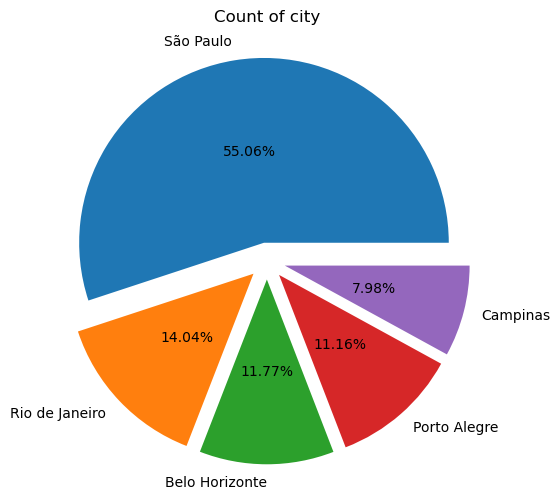

In [52]:
plt.figure(figsize=(8,6))
data=brazil_data['city'].value_counts()
labels=data.keys()
explode=[0.1]*len(data)
plt.pie(x=data, autopct='%.2f%%', explode=explode, labels=labels, pctdistance=0.5)
plt.title('Count of city')
plt.show()

# Interpretation:
City of Campinas and Porto Alegre is cheaper than other cities

# Analysis of rooms

In [41]:
fun_cat('rooms')

rooms: Mode of rooms are 3
rooms: Unique Values in rooms are: [ 2  4  1  3  7  5  8  6 10 13  9]
rooms: Number of Missing values in rooms is 0


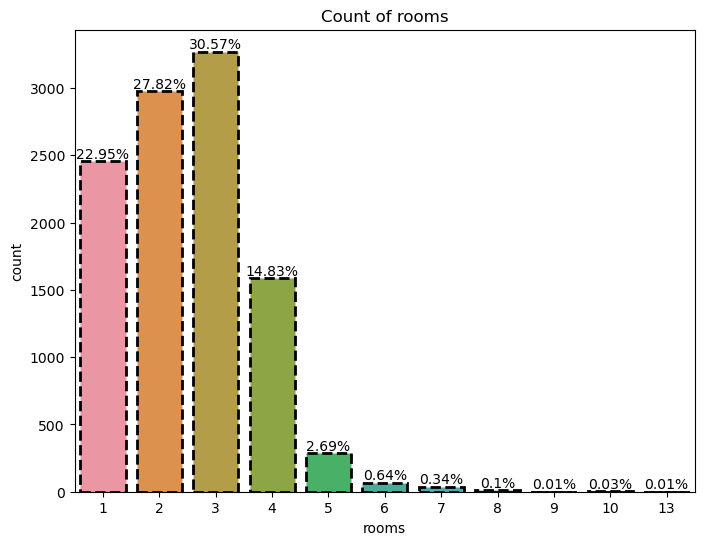

In [40]:
plt.figure(figsize=(8,6))
plt.title('Count of rooms')
ax= sb.countplot(x=brazil_data['rooms'], edgecolor='black', linewidth=2, linestyle='--')
for bar in ax.patches:
        percentage=f"{round(bar.get_height()/brazil_data.shape[0]*100,2)}%"
        
        x=bar.get_x() + bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage, (x,y), va='bottom', ha='center')

plt.show()

# Interpretation:
For Bachelors can taken 1 room, Mid Sized Family can take 2-3 room and for large Family can take above 4 rooms. 

# Analysis of bathroom

In [42]:
fun_cat('bathroom')

bathroom: Mode of bathroom are 1
bathroom: Unique Values in bathroom are: [ 1  4  3  2  6  5  7  9  8 10]
bathroom: Number of Missing values in bathroom is 0


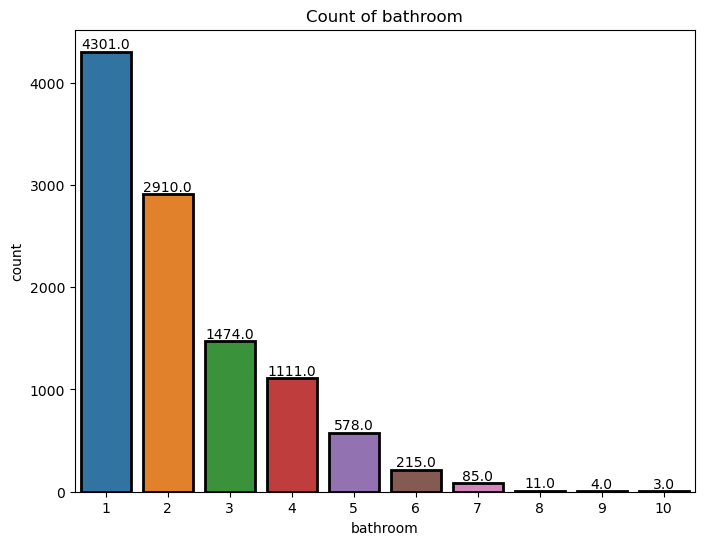

In [43]:
plt.figure(figsize=(8,6))
plt.title('Count of bathroom')
ax=sb.countplot(x=brazil_data['bathroom'], edgecolor='black', linewidth=2)
for bar in ax.patches:
        percentage=f"{round(bar.get_height() , 2)}"
        
        x=bar.get_x() + bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage, (x,y), va='bottom', ha='center')
plt.show()

# Interpratation:
There are maximum house having 1 Bathroom but it opt for bachelors, then 2 bathrooms for mid size Families

# Analysis of parking space

In [56]:
fun_cat('parking spaces')

parking spaces: Mode of parking spaces are 1
parking spaces: Unique Values in parking spaces are: [ 1  0  7  4  2  6  3  8  5 10 12]
parking spaces: Number of Missing values in parking spaces is 0


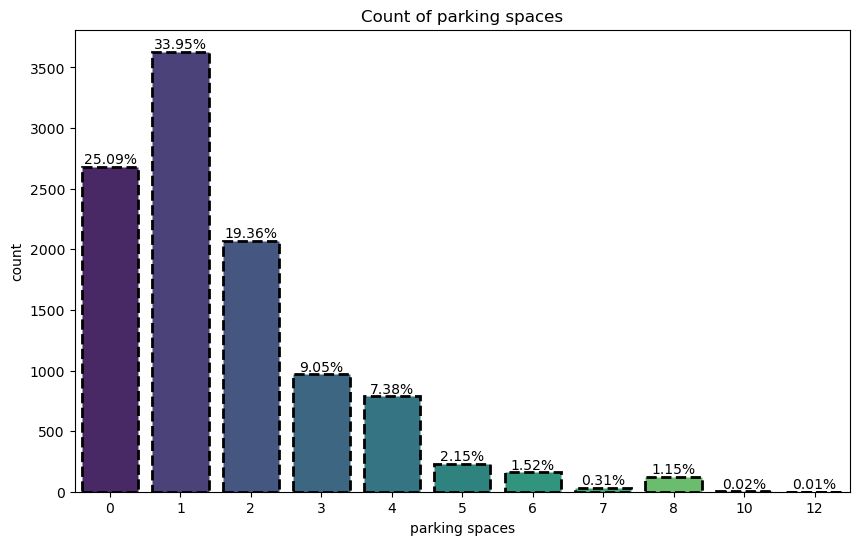

In [45]:
plt.figure(figsize=(10,6))
plt.title('Count of parking spaces')
ax=sb.countplot(x=brazil_data['parking spaces'],palette='viridis', edgecolor='black', linewidth=2, linestyle='--')
for bar in ax.patches:
        percentage=f"{round(bar.get_height()/brazil_data.shape[0]*100,2)}%"
        
        x=bar.get_x() + bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage, (x,y), va='bottom', ha='center')
plt.show()

# Interpretation:
In the dataset, a significant percentage of properties have at least one parking space available, suggesting good availability of parking options.

# Analysis of furniture

In [57]:
fun_cat('furniture')

furniture: Mode of furniture are not furnished
furniture: Unique Values in furniture are: ['furnished' 'not furnished']
furniture: Number of Missing values in furniture is 0


In [53]:
furnished_counts=brazil_data['furniture'].value_counts()

In [54]:
pd.DataFrame(furnished_counts)

,furniture
not furnished,8086
furnished,2606


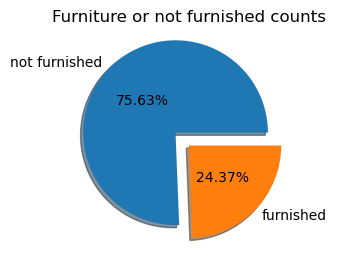

In [36]:
plt.figure(figsize=(8,3))
data=brazil_data['furniture'].value_counts()
labels=data.keys()
plt.title('Furniture or not furnished counts')
explode=[0.2,0]
plt.pie(x=data, autopct='%.2f%%', shadow=True, explode=explode, labels=labels, pctdistance=0.5)
plt.show()

# Interpretation:
There are 75.63% houses are not furnished and remaining are furnished house.

# Analysis of pets

In [32]:
fun_cat('animal')

animal: Mode of animal are acept
animal: Unique Values in animal are: ['acept' 'not acept']
animal: Number of Missing values in animal is 0


In [58]:
animal_counts=brazil_data['animal'].value_counts()
pd.DataFrame(animal_counts)

,animal
acept,8316
not acept,2376


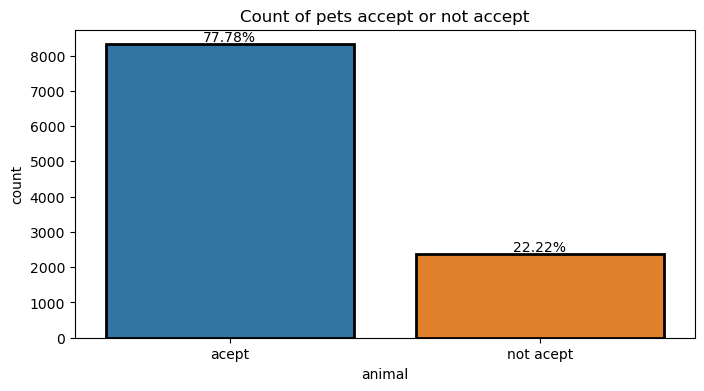

In [35]:
plt.figure(figsize=(8,4))
ax=sb.countplot(x=brazil_data['animal'], edgecolor='black', linewidth=2)
plt.title('Count of pets accept or not accept')
for bar in ax.patches:
        percentage = f"{round(bar.get_height()/brazil_data.shape[0]*100,2)}%"
        
        x=bar.get_x() + bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage, (x,y), va='bottom', ha='center')
plt.show()

# Interpretation:
Mostly 77.78% of houses are accepting pets

# Analysis of floors

In [65]:
fun_cat('floor')

floor: Mode of floor are 0
floor: Unique Values in floor are: [  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]
floor: Number of Missing values in floor is 0


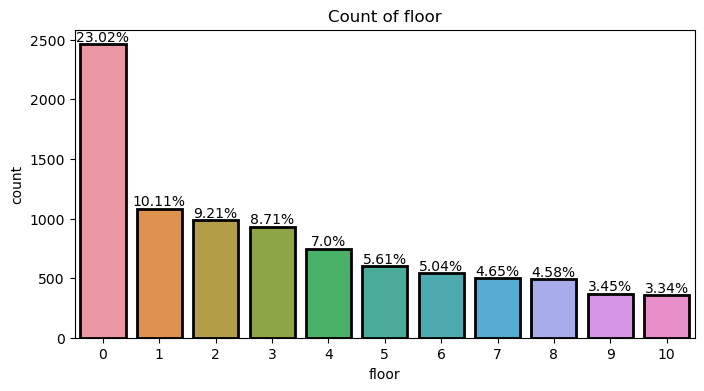

In [34]:
filtered_data=brazil_data[brazil_data['floor']<=10]
plt.figure(figsize=(8,4))
ax=sb.countplot(x=filtered_data['floor'], edgecolor='black', linewidth=2)
plt.title('Count of floor')
for bar in ax.patches:
        percentage = f"{round(bar.get_height()/brazil_data.shape[0]*100,2)}%"
        
        x=bar.get_x() + bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage, (x,y), va='bottom', ha='center')
plt.show()

# Interpretation:
There are house/flat with Number of floors. In that Maximum of house are available in ground floor.

# User defined functions for level 2 analysis of Numerical columns

In [66]:
def fun_num(col):
    if brazil_data[col].isnull().sum()>0:
        brazil_data[col].fillna(brazil_data[col].mean(), inplace=True)
    print(f"{col}: Mean is {brazil_data[col].mean()}")
    print(f"{col}: Median is {brazil_data[col].median()}")

# Analysis of area

In [91]:
fun_num('area')

area: Mean is 137.9769921436588
area: Median is 90.0


In [8]:
mean=int(brazil_data['area'].mean())

area=brazil_data[brazil_data['area']>800].index
for index in area:
    brazil_data.loc[index, 'area'] =mean

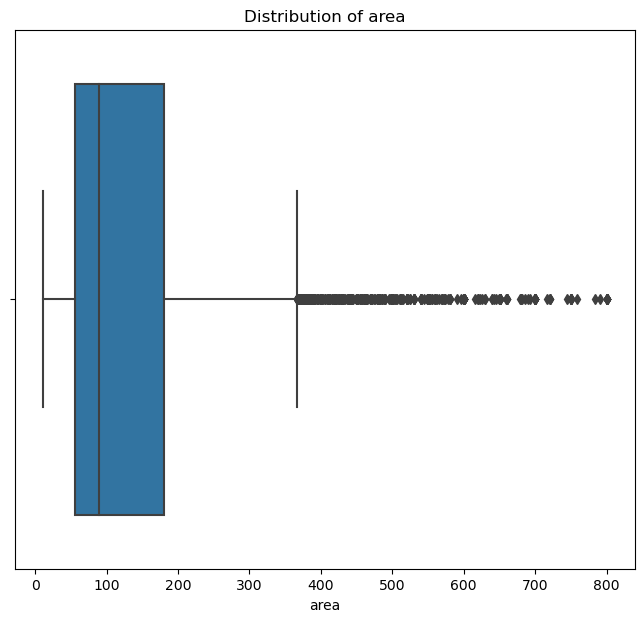

In [9]:
plt.figure(figsize=(8,7))
plt.title('Distribution of area')
sb.boxplot(x=brazil_data['area'])
#, color='red',edgecolor='black', linewidth=2, kde=True)
plt.show()

# Interpretation:
In the dataset, approximately 50% of properties have property areas ranging from 50 to 180 square meters, with a minimum of 10 sq. meters, a maximum of 380 sq. meters, and a median property area of 90 sq. meters. Values exceeding 390 sq. meters are considered outliers.

# Analysis of hoa

In [74]:
fun_num('hoa (R$)')

hoa (R$): Mean is 1174.0216984661429
hoa (R$): Median is 560.0


In [30]:
mean=int(brazil_data['hoa (R$)'].mean())

hoa=brazil_data[brazil_data['hoa (R$)']>3000].index
for index in hoa:
    brazil_data.loc[index, 'hoa (R$)'] =mean

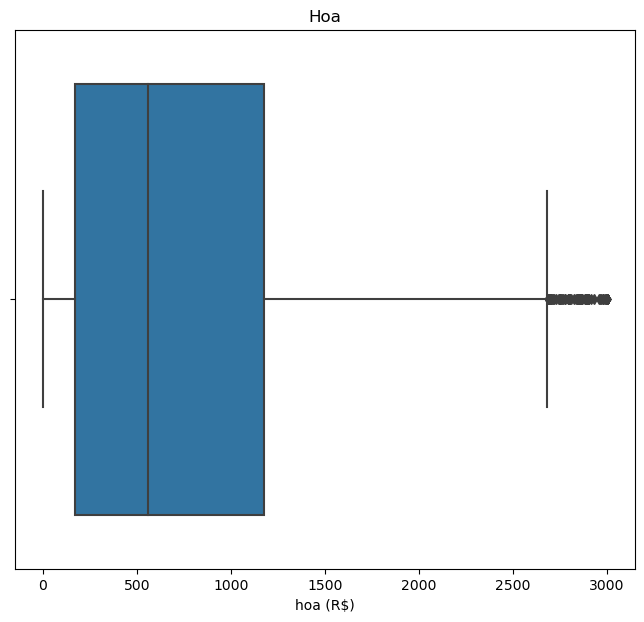

In [33]:
plt.figure(figsize=(8,7))
sb.boxplot(x=brazil_data['hoa (R$)'])
plt.title('Hoa')
plt.show()

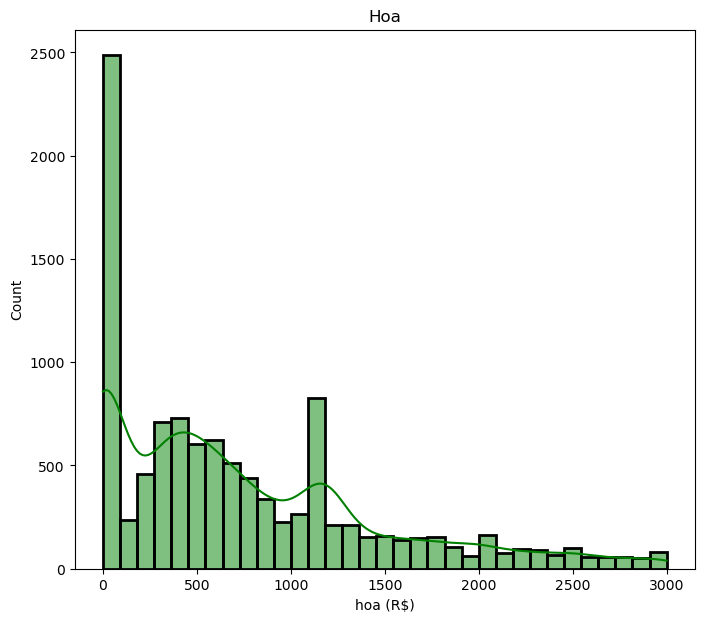

In [32]:
plt.figure(figsize=(8,7))
sb.histplot(x=brazil_data['hoa (R$)'],color='green', edgecolor='black', linewidth=2, kde=True)
plt.title('Hoa')
plt.show()

# Interpretation:
Mostly Homeowner association tax is above 1100. There is some Outliers are found

# Analysis of rent amount

In [89]:
fun_num('rent amount (R$)')

rent amount (R$): Mean is 3896.247194163861
rent amount (R$): Median is 2661.0


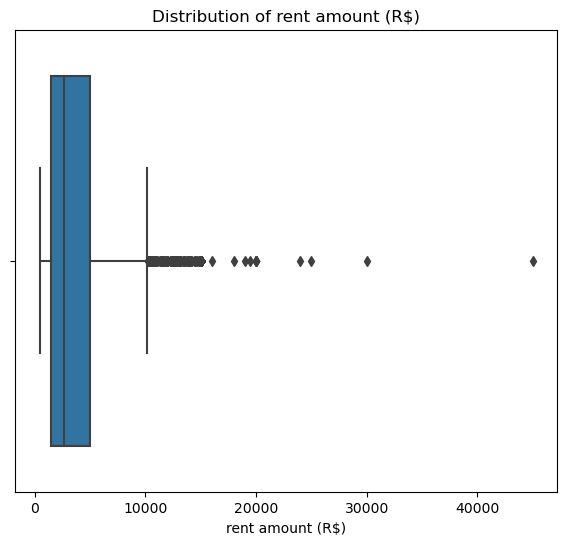

In [29]:
plt.figure(figsize=(7,6))
plt.xlabel('rent amount (R$)')
plt.title('Distribution of rent amount (R$)')
sb.boxplot(x=brazil_data['rent amount (R$)'])
plt.show()

# Interpretation:
50% of Rent amount is from 800-5000(month wise) may suitable for Families to run happy life.Minimum rent amount is approximately 200 and maximum rent amount is 10000. Median value is approximately 1000. More than 10000 are outliers.

# Analysis of property tax

In [92]:
fun_num('property tax (R$)')

property tax (R$): Mean is 366.70435839880287
property tax (R$): Median is 125.0


In [27]:
mean=int(brazil_data['property tax (R$)'].mean())

property_tax=brazil_data[brazil_data['property tax (R$)']>1000].index
for index in property_tax:
    brazil_data.loc[index, 'property tax (R$)'] =mean

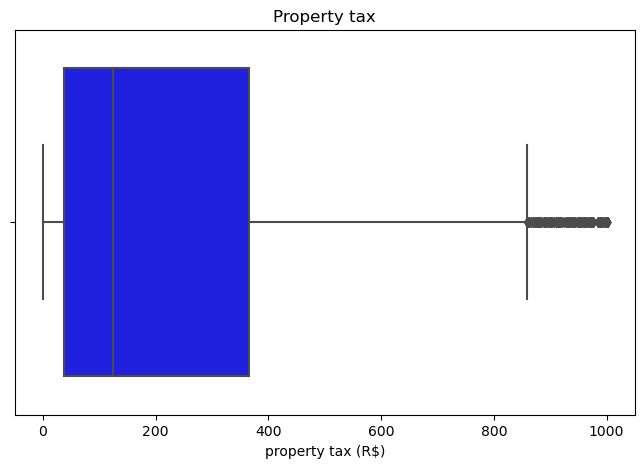

In [28]:
plt.figure(figsize=(8,5))
sb.boxplot(x=brazil_data['property tax (R$)'], color='blue')
plt.title('Property tax')
plt.show()

# Interpretation:
In the dataset, the property tax exhibits a minimum value of zero and a maximum of 850 (R in dollar). The median property tax stands at 125 (R in dollar). Approximately 50% of property tax values fall within the range of 100 (R in dollar) to 380 (R in dollar). Any property tax values exceeding 850 (R in dollar) are considered outliers.

# Analysis of total cost

In [105]:
fun_num('total (R$)')

total (R$): Mean is 5228.78011597456
total (R$): Median is 5357.0


In [11]:
mean=int(brazil_data['total (R$)'].mean())

total_cost=brazil_data[brazil_data['total (R$)']>10000].index
for index in total_cost:
    brazil_data.loc[index, 'total (R$)'] =mean

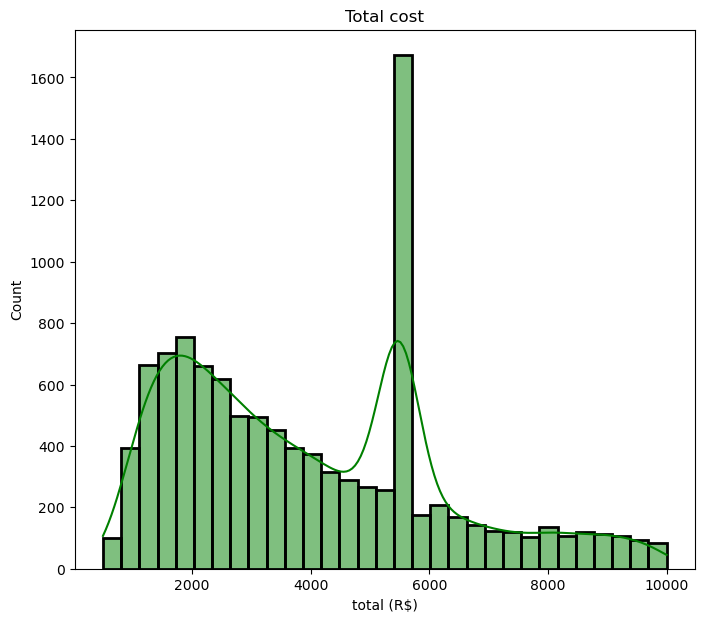

In [25]:
plt.figure(figsize=(8,7))
sb.histplot(x=brazil_data['total (R$)'],color='green', edgecolor='black', linewidth=2, kde=True)
plt.title('Total cost')
plt.show()

# Interpretation:
Calculating the total cost of rent amount, property tax and fire insurance. The total cost should be above 5000

# Analysis of fire insurance

In [106]:
fun_num('fire insurance (R$)')

fire insurance (R$): Mean is 53.300879161990274
fire insurance (R$): Median is 36.0


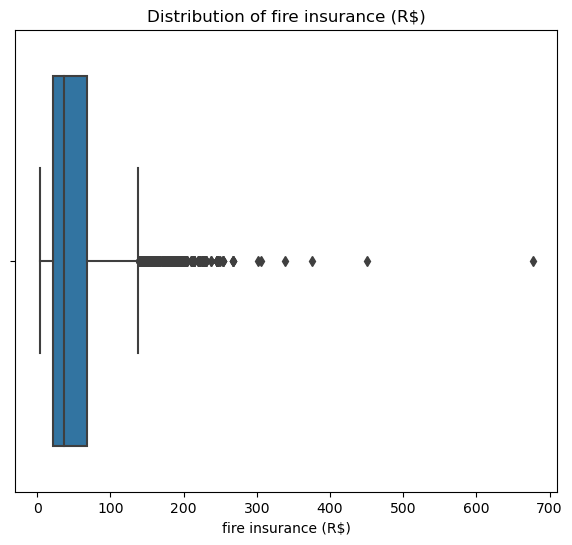

In [107]:
plt.figure(figsize=(7,6))
plt.xlabel('fire insurance (R$)')
plt.title('Distribution of fire insurance (R$)')
sb.boxplot(x=brazil_data['fire insurance (R$)'])
plt.show()

# Interpretation:
In the dataset, the fire insurance cost ranges from a minimum of zero R (dollars) to a maximum of 120 R (dollars). The median fire insurance cost is 36 R (dollars), and approximately 50% of the values fall within the range of 30 R to 55 R (dollars). Values exceeding 120 R (dollars) are considered outliers.

#  What is the distribution of total revenues total cost across different cities in brazil?

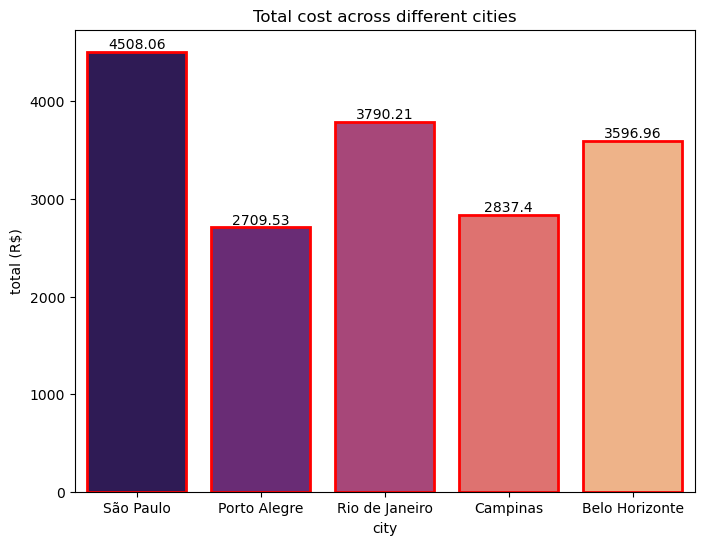

In [24]:
plt.figure(figsize=(8,6))
ax=sb.barplot(x='city', y='total (R$)', data=brazil_data, palette='magma', edgecolor='red', linewidth=2, ci=False)
for bar in ax.patches:
        percentage = f"{round(bar.get_height() , 2)}"
        
        x=bar.get_x() + bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage, (x,y), va='bottom', ha='center')
plt.title('Total cost across different cities')
plt.show()

# Interpretation:
The total cost for rent in city porto alegre is cheaper.

# Which city has the highest average rent amount?

In [108]:
avg_rent_by_city=brazil_data.groupby('city')['rent amount (R$)'].mean()
pd.DataFrame(avg_rent_by_city)

,rent amount (R$)
city,
Belo Horizonte,3664.127981
Campinas,2364.290739
Porto Alegre,2337.699916
Rio de Janeiro,3232.904064
São Paulo,4652.793783


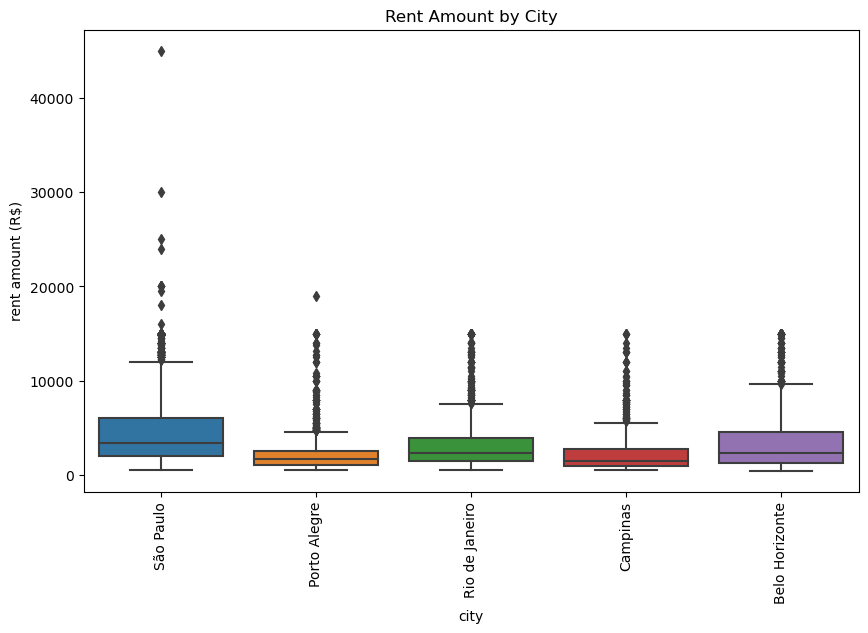

In [109]:
plt.figure(figsize=(10,6))
sb.boxplot(data=brazil_data, x='city', y='rent amount (R$)')
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('rent amount (R$)')
plt.title('Rent Amount by City')
plt.show()

# Interpretation:
Campinas and Porto Alegre are the cheapest city with less rent amount.

# Parking Spaces with Rent Amount

# What is the relationship between the number of parking spaces available for rental properties and their respective rent amounts in the dataset?

In [110]:
avg_rent_by_parking=brazil_data.groupby('parking spaces')['rent amount (R$)'].mean()
pd.DataFrame(avg_rent_by_parking)

,rent amount (R$)
parking spaces,
0,2140.854268
1,2602.666116
2,4525.238647
3,6430.960744
4,7752.551331
5,8278.117391
6,8867.846626
7,9486.363636
8,8704.325203


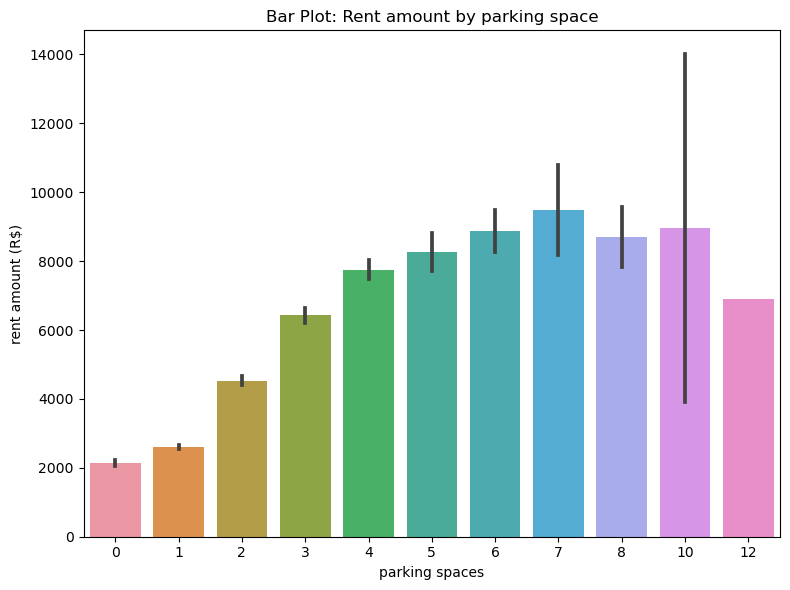

In [23]:
plt.figure(figsize=(8,6))
sb.barplot(data=brazil_data, x='parking spaces', y='rent amount (R$)')
plt.title('Bar Plot: Rent amount by parking space')
plt.tight_layout()
plt.show()

# Interpretation:
The Zero Parking Spaces has less Rent amount compare to other Parking Spaces

# Which city has the lowest property tax?

In [112]:
low_property_tax=brazil_data.groupby('city')['property tax (R$)'].agg(['min','max', 'mean'])
pd.DataFrame(low_property_tax)

,min,max,mean
city,,,
Belo Horizonte,0,990,213.977742
Campinas,0,1000,137.595545
Porto Alegre,0,959,105.637888
Rio de Janeiro,0,1000,193.666223
São Paulo,0,1000,247.341770


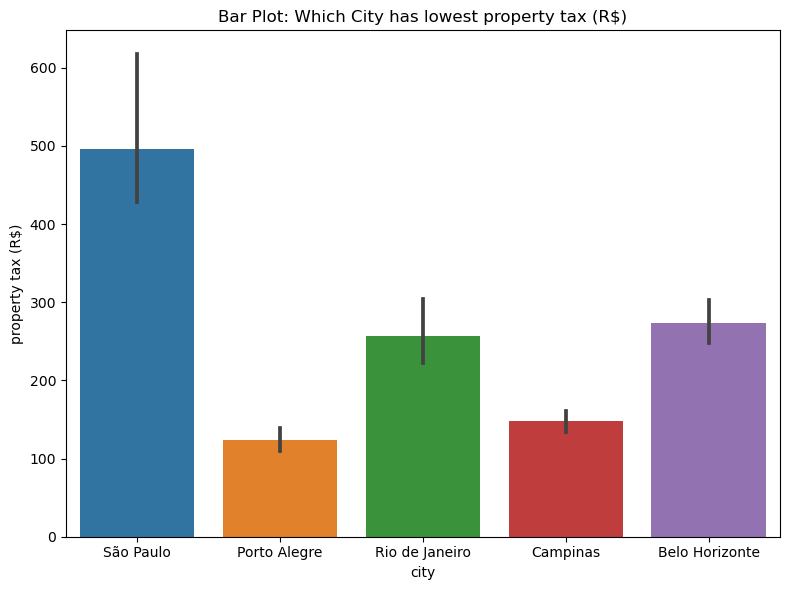

In [39]:
plt.figure(figsize=(8,6))
sb.barplot(data=brazil_data, x='city', y='property tax (R$)')
plt.title('Bar Plot: Which City has lowest property tax (R$)')
plt.tight_layout()
plt.show()

# Interpretation:
Porto alegre has lowest property tax and Campinus also have less property tax.

# Rent vs property tax

# How does the rent amount of properties relate to their property tax amounts in the dataset?

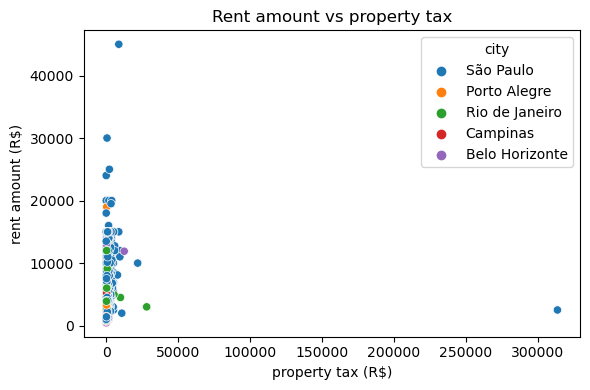

In [22]:
plt.figure(figsize=(6,4))
sb.scatterplot(data=brazil_data, x='property tax (R$)',y='rent amount (R$)', hue='city')
plt.title('Rent amount vs property tax')

plt.tight_layout()
plt.show()

# Interpretation:
Based on property tax amount for particular cities based on that rent amount is fixed.

# Rent amount vs fire insurance 

# How does the rent amount relate to the fire insurance cost for properties in the dataset, and are there any trends between them?

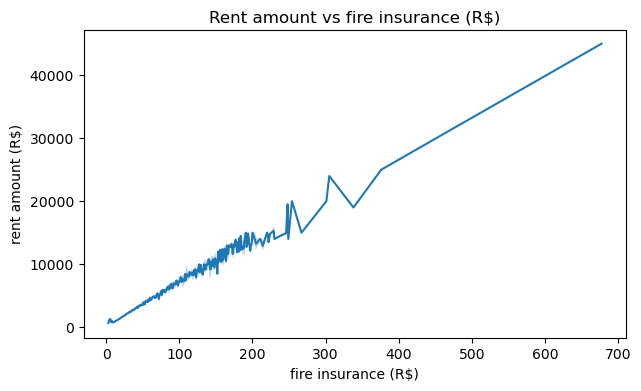

In [21]:
plt.figure(figsize=(7,4))
sb.lineplot(data=brazil_data, x='fire insurance (R$)', y='rent amount (R$)')
plt.xlabel('fire insurance (R$)')
plt.ylabel('rent amount (R$)')
plt.title('Rent amount vs fire insurance (R$)')
plt.show()

# Interpretation:
There is a rise in fire insurance based on rent amount.

# Furniture and pets

In [116]:
fur_pet=pd.crosstab(brazil_data['furniture'], brazil_data['animal'])
pd.DataFrame(fur_pet)

animal,acept,not acept
furniture,,
furnished,1859,747
not furnished,6457,1629


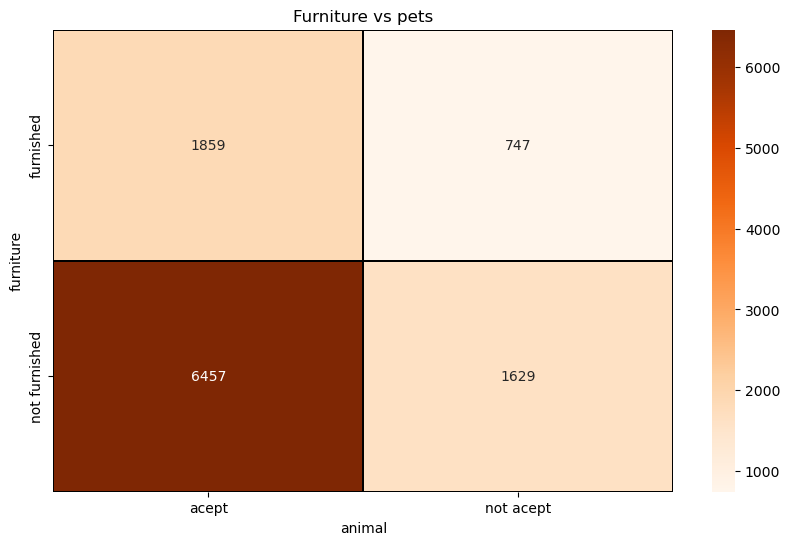

In [20]:
plt.figure(figsize=(10,6))
sb.heatmap(pd.crosstab(index=brazil_data['furniture'], columns=brazil_data['animal']),annot=True,fmt='.0f', cmap='Oranges', linecolor='black', linewidth=.2)
plt.title('Furniture vs pets')
plt.show()

# Interpretation:
Clients who need a house which is not furnished and accept pet are higher than other cases.

# Rooms, rent amount and city

# How do the number of rooms, rent amounts, and cities correlate in the dataset, and are there variations in rent amounts and room counts across different cities?

<Figure size 1000x600 with 0 Axes>

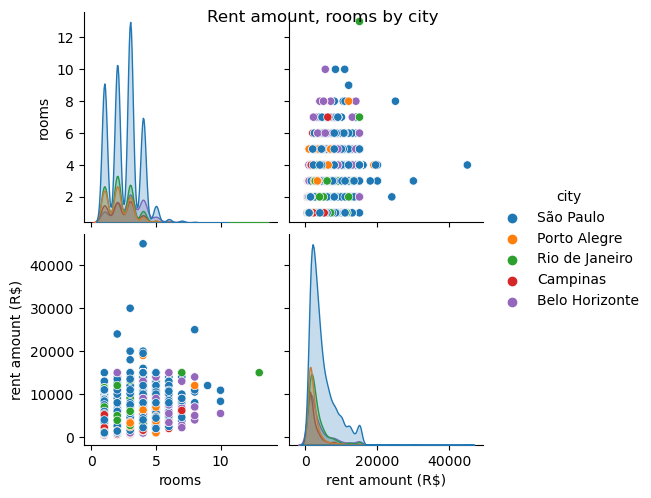

In [19]:
plt.figure(figsize=(10, 6))
sb.pairplot(data=brazil_data, vars=(['rooms','rent amount (R$)']), hue='city')
plt.xlabel('Number of Rooms')
plt.ylabel('Rent Amount')
plt.suptitle('Rent amount, rooms by city')
plt.show()

# Interpretation:
City wise rooms and rent amount is Belo Horizonte is cheaper

# City and room 

# Do different cities have varying numbers of rooms in their properties, and are there any trends or patterns in room counts across cities?

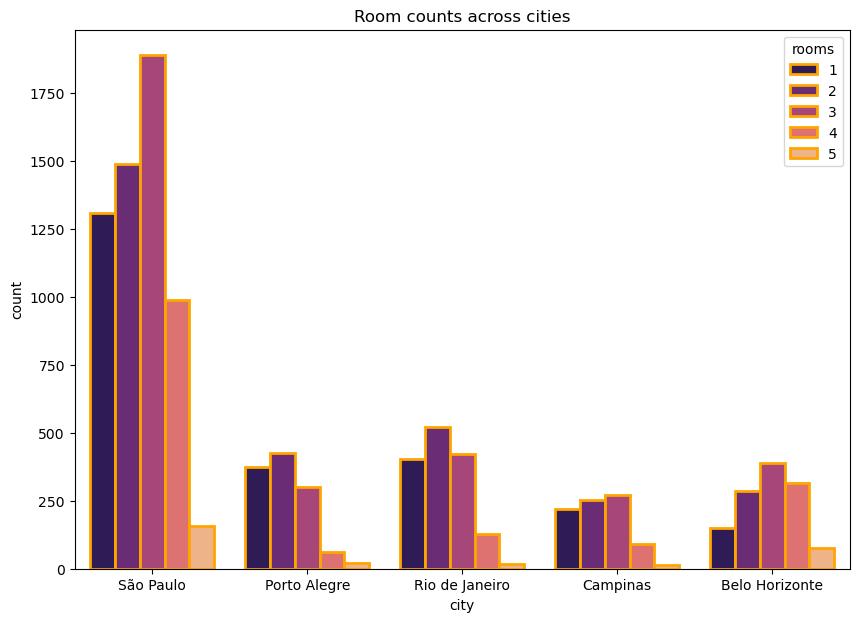

In [18]:
filtered_data=brazil_data[brazil_data['rooms']<=5]
fig, ax=plt.subplots(figsize=(10,7))
sb.countplot(x='city', hue='rooms', data=filtered_data, palette='magma', edgecolor='Orange', linewidth=2)
plt.title('Room counts across cities')
plt.show()

# Interpretation:
Sao Paulo has all kind of rooms but their cost of living may very high. But We can consider that city of campinas and porto alegre has many number of rooms and cheaper.

# Total cost and parking spaces

# Is there a relationship between the total cost of properties and the availability of parking spaces?

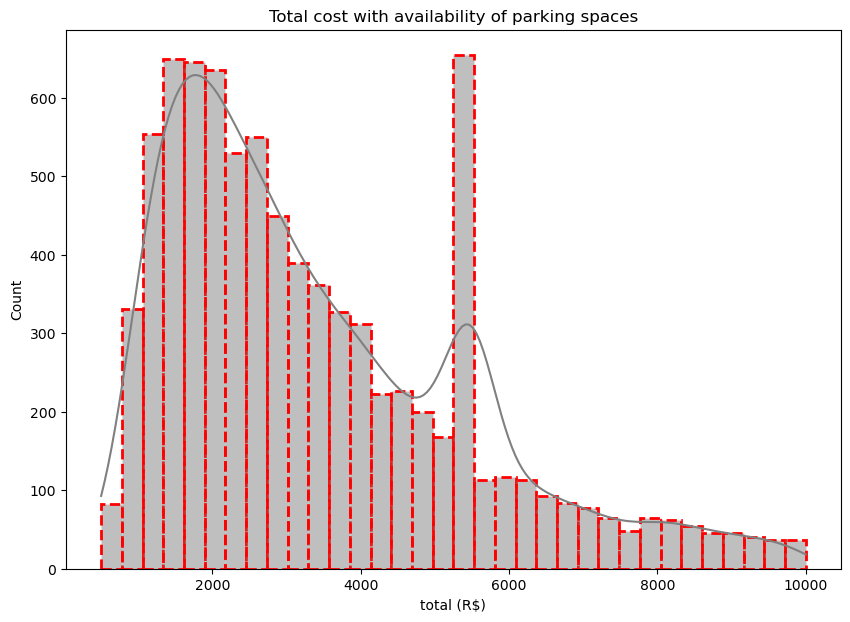

In [39]:
data=brazil_data[brazil_data['parking spaces']<=2]
fig, ax=plt.subplots(figsize=(10,7))
sb.histplot(data=data, x='total (R$)', kde=True,color='grey', linestyle='--', edgecolor='red', linewidth=2)
plt.title('Total cost with availability of parking spaces')
plt.show()

# Interpretation:
Cities can be considered for lesser parking spaces with less total cost.

# Rooms Vs parking spaces

# Do the number of rooms in a property influence the availability of parking spaces?

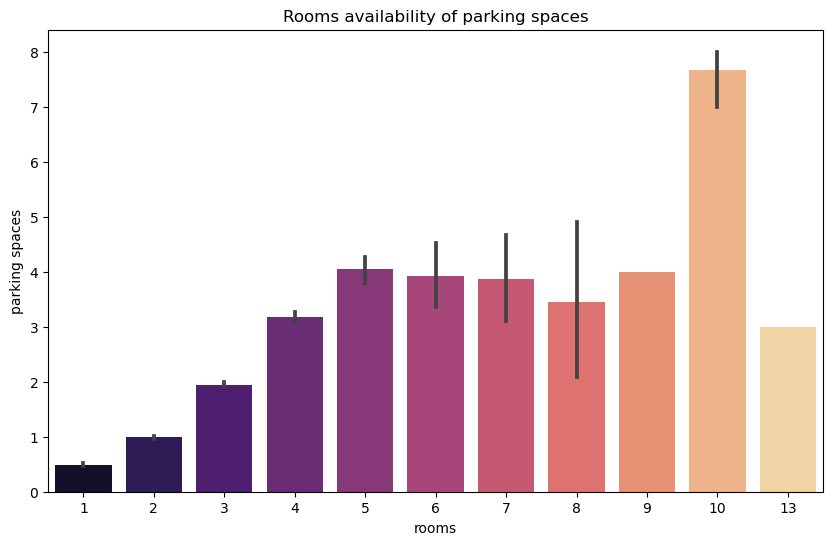

In [37]:
plt.figure(figsize=(10,6))
sb.barplot(x='rooms', y='parking spaces', data=brazil_data, palette='magma')
plt.title('Rooms availability of parking spaces')
plt.show()

# Interpretation:
Based on rooms, parking spaces is given for bachelors, mid-size and for large families. More parking spaces will not make any sense.

# Rooms, rent amount and furniture

# How does the presence of furniture influence the relationship between the number of rooms, rent amount, and property rentals in the dataset?

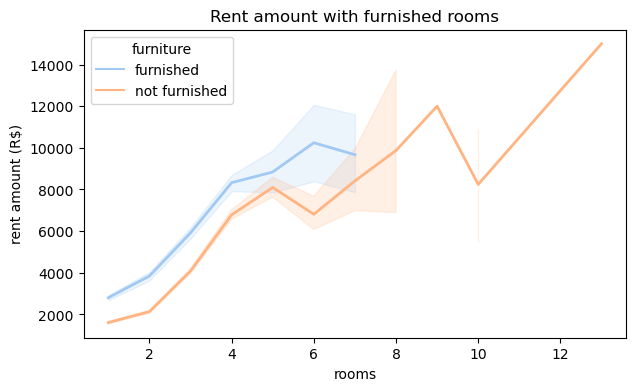

In [16]:
plt.figure(figsize=(7,4))
sb.lineplot(data=brazil_data, x='rooms', y='rent amount (R$)', hue='furniture', palette='pastel', linewidth=2)
plt.xlabel('rooms')
plt.ylabel('rent amount (R$)')
plt.title('Rent amount with furnished rooms')
plt.show()

# Interpretation:
The two room set are really affordable which are furnished, otherwise the furnished homes are really expensive.

# City, total cost and furniture

# Do different cities exhibit variations in total costs, and how is this affected by the presence of furniture?

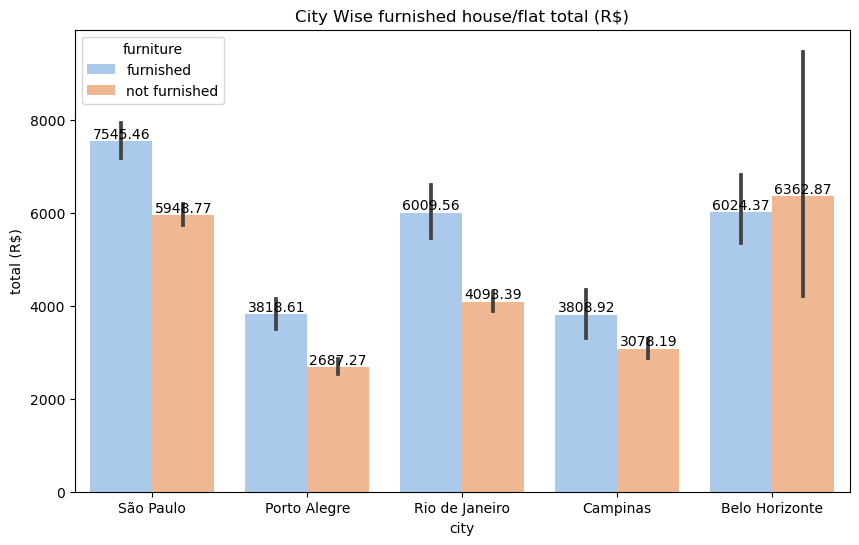

In [39]:
fig,ax=plt.subplots(figsize=(10,6))
ax=sb.barplot(x='city', y='total (R$)',data=brazil_data, hue='furniture', palette='pastel', linewidth=2, linestyle='--')
plt.title('City Wise furnished house/flat total (R$)')
for bar in ax.patches:
        percentage = f"{round(bar.get_height() , 2)}"
        
        x=bar.get_x() + bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage, (x,y), va='bottom', ha='center')
plt.show()

# Interpretation:
If someone looking for furnished house and that should be cheap is again Porto Alegre

# City, total cost and animal

# How does the city of a property impact the total cost, and is there a connection between allowing pets and the total cost of rentals?

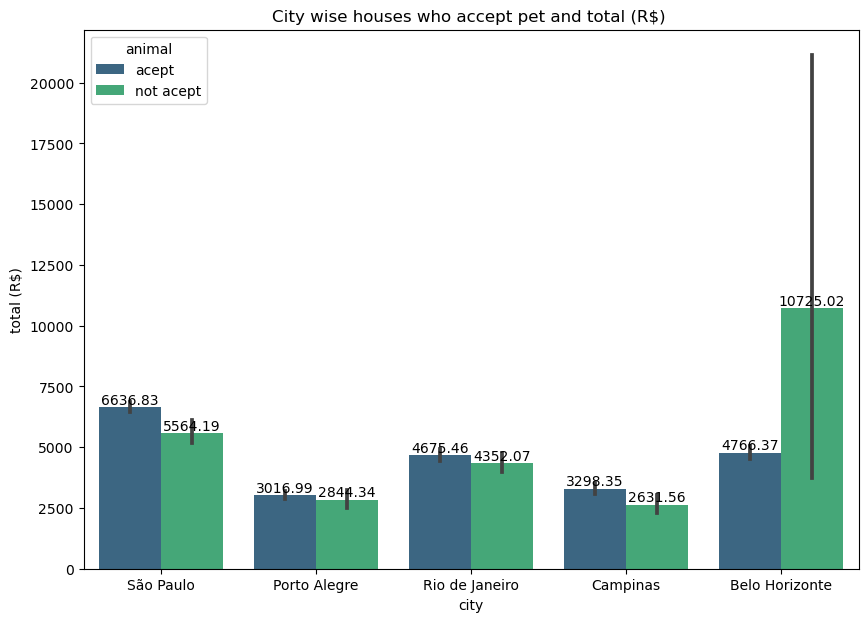

In [38]:
fig,ax=plt.subplots(figsize=(10,7))
ax=sb.barplot(x='city', y='total (R$)',data=brazil_data, hue='animal', palette='viridis', linewidth=2, linestyle='--')
plt.title('City wise houses who accept pet and total (R$) ')
for bar in ax.patches:
        percentage = f"{round(bar.get_height() , 2)}"
        
        x=bar.get_x() + bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage, (x,y), va='bottom', ha='center')
plt.show()

# Interpretation:
Cities Porto and Campinas almost 50% accepts pets and also not expensive

# Suitable City for Relocation for Bachelors, for Mid-Sized Families and for Large Families

# Suitable city to relocate
1. Cheapest city for bachelor: Campinas, Porto Alegre
2. Cheapest city for mid sized family: Porto Alegre, BeloHorizonte,
3. Cheapest city for large family: Porto Alegre, São Paulo(rent is not an issue)

In [41]:
print('Recommendation: ')
print('1. The Total Cost for rent in city Porto Alegre is cheaper.')
print('2. If someone looking for furnsied house and that should be cheap is Porto Alegre.')
print('3. Cities Porto Alegre And Campinas are almost 50 % accepts pets and are also not expensive.')
print('4. The 50% house having lesser than 3 room and accepts pets.')
print('5. Porto Alegre has lowest Property tax and Campinus also have less property Tax')
print('6. The Two room set are really affordable which are furnished, otherwise the furnished homes are really expensive.')
print('7. The Total amount increases on increase in parking spaces and the house, If furnised the cost become more higher.')
print('8. Sao Paulo can be considered if rent is not a issue.')
print('9. The Average amount of 1 and 2 room set is not so significantly different and hence one should consider buying 2 room set if they is looking for the small house.')
print('10. The Average price for renting a room of 3 rooms and lesser, the total rent would be around 2000-3000 obviously depending on the number of rooms you are considering.')
print('11. The Parking space is higher when number of rooms increases on increase of rooms and thats true conisering bigger Family would have more cars and need more parking spaces.')
print('12. There is not much difference in price for 0 and 1 parking space and one should go for atleast 1 parking space house.In future they may require that.')
print('13. If Someone is looking for the one parking space or lower and wants less rent so that people can opt for Campinas, Belo Horizonate.')
print('14. Cities Porto Alegre and Rio de Janeria can be considered for lesser parking spaces and cheaper rent.')
print('15. The House are cheaper where pets are not allowed and the price diference is also quite significant.')
print('16. Considering Large Family, They may need 4 room set and higher, the parking space doesnt affect the price because If considering 4 rooms set, there you are expected to get 2-3 parking spaces with no other extra price.')

Recommendation: 
1. The Total Cost for rent in city Porto Alegre is cheaper.
2. If someone looking for furnsied house and that should be cheap is Porto Alegre.
3. Cities Porto Alegre And Campinas are almost 50 % accepts pets and are also not expensive.
4. The 50% house having lesser than 3 room and accepts pets.
5. Porto Alegre has lowest Property tax and Campinus also have less property Tax
6. The Two room set are really affordable which are furnished, otherwise the furnished homes are really expensive.
7. The Total amount increases on increase in parking spaces and the house, If furnised the cost become more higher.
8. Sao Paulo can be considered if rent is not a issue.
9. The Average amount of 1 and 2 room set is not so significantly different and hence one should consider buying 2 room set if they is looking for the small house.
10. The Average price for renting a room of 3 rooms and lesser, the total rent would be around 2000-3000 obviously depending on the number of rooms you are